# LAB 4: Gram-Schmidt and Eigenvalues & Eigenvectors



In this lab you will use Python to study the following topics:

- The Gram-Schmidt Algorithm to change an independent set of vectors into anorthonormal set.

- Determination of eigenvalues and eigenvectors using the characteristic polynomial of a matrix

- Use of eigenvectors to transform a matrix to diagonal form.


# First: you should run this cell

In [242]:
# Make all numpy available via shorter 'np' prefix
import numpy as np
# Make all sympy available via shorter 'sym' prefix
import sympy as sym

import math


#import plotter
import matplotlib.pyplot as plt


def rvect(m):
    return np.fix((10 * (np.random.rand(m, 1))))


def rmat(m, n):
    return np.fix((10 * (np.random.rand(m, n))))

#  Question 1 : Gram-Schmidt Orthogonalization

#### Generate three random vectors in $R^3$ by

- `u1 = np.array([[4], [9], [6]])`
- `u2 = np.array([[6], [8], [8]])`
- `u3 = np.array([[0], [9], [6]])`

- Check whether they are linearly independent by calculating `np.linalg.matrix_rank(np.block([u1, u2, u3]))`.
- If the answer is not 3, then generate a new random set of vectors and calculate the rank. Repeat until the rank is 3. Now use these vectors in the following calculations.

In [243]:
u1 = np.array([[4], [9], [6]])
u2 = np.array([[6], [8], [8]])
u3 = np.array([[0], [9], [6]])

print("u1 = \n", u1)
print("u2 = \n", u2)
print("u3 = \n", u3)

print("rank = ", np.linalg.matrix_rank(np.block([u1, u2, u3])))

u1 = 
 [[4]
 [9]
 [6]]
u2 = 
 [[6]
 [8]
 [8]]
u3 = 
 [[0]
 [9]
 [6]]
rank =  3


In [244]:
#type your code here:



#### Plot the three vectors in the graphics window as red, green, and blue dotted lines by the commands:
- `r = np.arange(0, 1, 0.05)`
- `ax = plt.axes(projection='3d')`
- `ax.plot3D(r * u1[0], r * u1[1], r * u1[2], 'r:')`
- `ax.plot3D(r * u2[0], r * u2[1], r * u2[2], 'g:')`
- `ax.plot3D(r * u3[0], r * u3[1], r * u3[2], 'b:')`

#### Determine visually whether the vectors are mutually orthogonal or not.

### ---------------------------------------------------Write your answer here--------------------------------------------







### --------------------------------------------------------------------------------------------------------------------------------

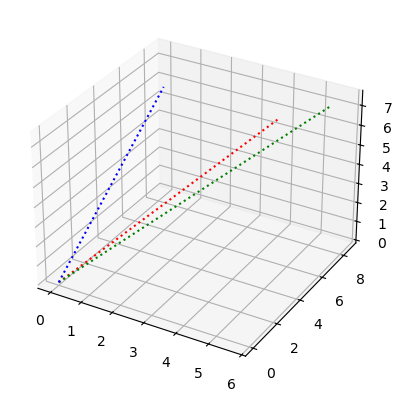

In [245]:
r = np.arange(0, 1, 0.05)
ax = plt.axes(projection = '3d')
ax.plot(r * u1[0], r * u1[1], r * u1[2], 'r:')
ax.plot(r * u2[0], r * u2[1], r * u2[2], 'g:')
ax.plot(r * u3[0], r * u3[1], r * u3[2], 'b:')

In [246]:
#type your code here


#### (b) Now use the vectors u1, u2, u3 to obtain an orthogonal basis for R3, following the Gram-Schmidt algorithm. Set `v1 = u1`. Obtain v2 by removing the component of u2 in the direction v1:


\\[v_2 = u_2 - \frac{v_1 \cdot u_2}{v_1 \cdot v_1}v_1\\]

- Calculate the dot product to check that the vectors v1 and v2 are mutually orthogonal (within a negligible numerical error). Also add v2 to your graphics window as a dashed-dotted green line.

v1 = 
 [[4]
 [9]
 [6]]
v2 = 
 [[ 1.66917293]
 [-1.7443609 ]
 [ 1.5037594 ]]

v1 . v2 =  [[4.61852778e-14]]


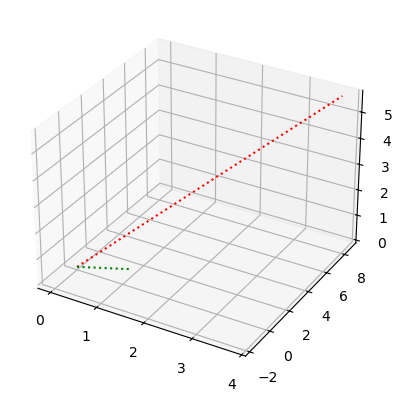

In [247]:
v1 = u1
v2 = u2 - (((u2.T @ v1) / (np.linalg.norm(v1) ** 2)) * (v1))

print("v1 = \n", v1)
print("v2 = \n", v2)
print("\nv1 . v2 = ", v1.T @ v2)

r = np.arange(0, 1, 0.05)
ax = plt.axes(projection = '3d')
ax.plot(r * v1[0], r * v1[1], r * v1[2], 'r:')
ax.plot(r * v2[0], r * v2[1], r * v2[2], 'g:')


In [248]:
#type your code here


#### Now obtain v3 by removing the components of u3 in the directions of v1 and v2:

\\[v_3 = u_3 - \frac{v_1 \cdot u_3}{v_1 \cdot v_1}v_1 - \frac{v_2 \cdot u_3}{v_2 \cdot v_2}v_2\\\\]
- Calculate dot products by python to check that v3 is orthogonal to the vectors v1 and v2 (within a negligible numerical error). Add v3 to your plot as a dashed-dotted blue line by

In [249]:
v3 = u3 - (((u3.T @ v1) / (np.linalg.norm(v1) ** 2)) * (v1)) - (((u3.T @ v2) / (np.linalg.norm(v2) ** 2)) * (v2))

print("v3 = \n", v3)
print("\nv1 . v3 = ", v1.T @ v3)
print("\nv2 . v3 = ", v2.T @ v3)


v3 = 
 [[-2.14126394]
 [-0.35687732]
 [ 1.96282528]]

v1 . v3 =  [[6.75015599e-14]]

v2 . v3 =  [[-3.99680289e-14]]


In [250]:
#type your code here


#### Add v3 to your plot as a dashed-dotted blue line. Obtain a good alignment of the graph that shows orthogonality in perspective using:
- `ax.view_init(angle1, angle2)`

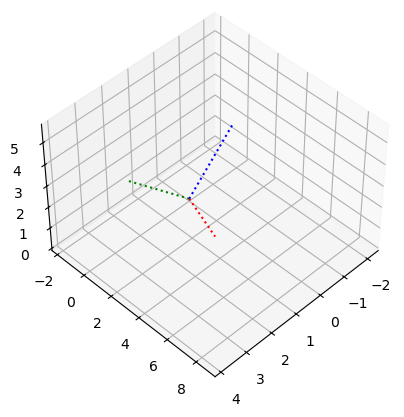

In [251]:
r = np.arange(0, 1, 0.05)
ax = plt.axes(projection = '3d')
ax.plot(r * v1[0], r * v1[1], r * v1[2], 'r:')
ax.plot(r * v2[0], r * v2[1], r * v2[2], 'g:')
ax.plot(r * v3[0], r * v3[1], r * v3[2], 'b:')
ax.view_init(45, 45)


In [252]:
#type your code here


#### (c) The last step in the Gram-Schmidt algorithm is to rescale the vectors v1, v2, v3 to obtain an orthonormal basis for R3:

- `w1 = v1 / np.linalg.norm(v1)`
- `w2 = v2 / np.linalg.norm(v2)`
- `w3 = v3 / np.linalg.norm(v3)`

#### Define the matrix Q = [w1, w2, w3] and give written answers to the following questions.



- What is the inverse matrix Q Now.

In [253]:
w1 = v1 / np.linalg.norm(v1)
w2 = v2 / np.linalg.norm(v2)
w3 = v3 / np.linalg.norm(v3)

print("w1 = \n", w1)
print("w2 = \n", w2)
print("w3 = \n", w3)

Q = np.block([w1, w2, w3])
print("Q = \n", Q)

print("Q.T @ Q = \n", Q.T @ Q)
print("Q-1 = \n", np.linalg.inv(Q))


w1 = 
 [[0.34684399]
 [0.78039897]
 [0.52026598]]
w2 = 
 [[ 0.58684177]
 [-0.61327608]
 [ 0.52868628]]
w3 = 
 [[-0.73165291]
 [-0.12194215]
 [ 0.67068184]]
Q = 
 [[ 0.34684399  0.58684177 -0.73165291]
 [ 0.78039897 -0.61327608 -0.12194215]
 [ 0.52026598  0.52868628  0.67068184]]
Q.T @ Q = 
 [[ 1.00000000e+00  1.39116549e-15  1.95842042e-15]
 [ 1.39116549e-15  1.00000000e+00 -4.83501769e-15]
 [ 1.95842042e-15 -4.83501769e-15  1.00000000e+00]]
Q-1 = 
 [[ 0.34684399  0.78039897  0.52026598]
 [ 0.58684177 -0.61327608  0.52868628]
 [-0.73165291 -0.12194215  0.67068184]]


In [254]:
#type your code here:


# Question 2. Eigenvectors and Diagonalization

#### (a) Generate a random 3 * 3 integer matrix and test whether its eigenvalues are all real by the commands

- `A = rmat(3,3)`
- Use [numpy.linalg.eig](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html) to obtain the eigenvalues of `A` as follows:
    - `w, v = np.linalg.eig(A)`. Where `w` are the eigenvalues and `v`the normalized (unit “length”) eigenvectors, such that the column `v[:,i]` is the eigenvector corresponding to the eigenvalue `w[i]`.
- `z = w - w.real`

If any entry in the vector z is not zero, then the eigenvalues of A are not all real. In this case repeat these commands until you get an A for which z has all zeros.

<div class="alert alert-warning">
    <h4>
        If you generated any matrices with complex eigenvalues, be very careful here! don't use it for the next questions!
    </h4>
</div>

In [255]:
A = rmat(3, 3)
w, v = np.linalg.eig(A)

print("A \n", A)
print("W = \n", w)
print("V = \n", v)

z = w - w.real
print("z = \n", z)


A 
 [[6. 9. 9.]
 [6. 1. 2.]
 [1. 0. 6.]]
W = 
 [-4.45122627 12.39398713  5.05723915]
V = 
 [[ 0.68285504 -0.86664515 -0.57363552]
 [-0.7276263  -0.48016135 -0.54837444]
 [-0.06533731 -0.13554065  0.60846345]]
z = 
 [0. 0. 0.]


In [256]:
#type your code here:


#### Now calculate the characteristic polynomial p(t) of your matrix A by

- Symbolic computations are done with `Symbol` class in `sympy`. Read the [documentation](https://docs.sympy.org/latest/gotchas.html#introduction) for many different examples.
- `from sympy.abc import t`
- `I = np.eye(3)`
- `p = sym.det(sym.Matrix(A - t * I))`
- `sym.solve(p)`


#### Plot the characteristic polynomial of A in a graphics window

- `p1 = sym.plot(p, (t, -10, 10), show=False)`
- `p1.show()`

- Adjust the horizontal range of the plot (change [ -10,10] if needed).
- View the graph with a range that shows all three real roots, and include the graph in your lab report. Use the graph to obtain approximate values for the three real roots of p(t).


p = 
 -1.0*t**3 + 13.0*t**2 + 15.0*t - 279.0
roots = 
 [-4.45122627218909 + 0.e-20*I, 5.05723914533228 + 0.e-19*I, 12.3939871268568 - 0.e-22*I]


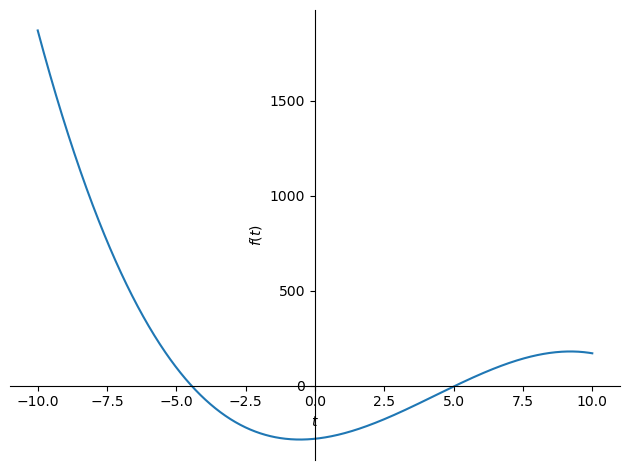

In [257]:
from sympy.abc import t
I = np.eye(3)
p = sym.det(sym.Matrix(A - t * I))
roots = sym.solve(p)

print("p = \n", p)
print("roots = \n", roots)
p1 = sym.plot(p, (t, -10, 10), show = False)
p1.show()

In [258]:
#typr your code here:


#### (b)Use the python to generate a matrix P and a diagonal matrix D. 

- `w, P = np.linalg.eig(A)`
- `D = np.linalg.diag(w)`

- Compare the diagonal entries of D with your graphical estimates for the eigenvalues of A in part (a).

#### Use python to define (the columns of P).

- `p1 = P[:, [0]]`
- `p2 = P[:, [1]]`
- `p3 = P[:, [2]]`
 
#### Calculate

- `A @ p1 - D[0, 0] * p1`
- `A @ p2 - D[1, 1] * p2`
- `A @ p3 - D[2, 2] * p3`

#### What does this calculation tell you about the eigenvalues and eigenvectors of A? 

### ---------------------------------------------------Write your answer here------------------------------------







### ------------------------------------------------------------------------------------------------------------------------

In [259]:
w, p = np.linalg.eig(A)
D = np.diag(w)

print("p = \n", p)
print("D = \n", D)

p1 = p[:, [0]]
p2 = p[:, [1]]
p3 = p[:, [2]]

print("A @ P1 - D[0, 0] * P1 = \n", A @ p1 - D[0, 0] * p1)
print("A @ P2 - D[1, 1] * P2 = \n", A @ p2 - D[1, 1] * p2)
print("A @ P3 - D[2, 2] * P3 = \n", A @ p3 - D[2, 2] * p3)

p = 
 [[ 0.68285504 -0.86664515 -0.57363552]
 [-0.7276263  -0.48016135 -0.54837444]
 [-0.06533731 -0.13554065  0.60846345]]
D = 
 [[-4.45122627  0.          0.        ]
 [ 0.         12.39398713  0.        ]
 [ 0.          0.          5.05723915]]
A @ P1 - D[0, 0] * P1 = 
 [[-4.88498131e-15]
 [ 0.00000000e+00]
 [-1.11022302e-16]]
A @ P2 - D[1, 1] * P2 = 
 [[0.]
 [0.]
 [0.]]
A @ P3 - D[2, 2] * P3 = 
 [[3.10862447e-15]
 [8.88178420e-16]
 [8.88178420e-16]]


In [260]:
#type your code here:


#### (c) Let A, P, D be as in part (b).

- Verify by python that `A = P @ D @ np.linalg.inv(P)`.
- Use this formula for A to express A<sup>5</sup> and A<sup>10</sup> symbolically in terms of P, P<sup>-1</sup>, D<sup>5</sup> and D<sup>10</sup>.
- Verify your answer to this question numerically using python. Hint: use `np.linalg.matrix_power(A, 5)` to calculate A<sup>5</sup>.

### ---------------------------------------------------Write your answer here------------------------------------







### ------------------------------------------------------------------------------------------------------------------------

In [261]:
print("A = \n", A)

print("p @ D @ p^-1 = \n", p @ D @ np.linalg.inv(p))

print("A^5 = \n", np.linalg.matrix_power(A, 5))

print("p @ D^5 @ p^-1 = \n", p @ np.linalg.matrix_power(D, 5) @ np.linalg.inv(p))

print("A^10 = \n", np.linalg.matrix_power(A, 10))

print("p @ D^10 @ p^-1 = \n", p @ np.linalg.matrix_power(D, 10) @ np.linalg.inv(p))


A = 
 [[6. 9. 9.]
 [6. 1. 2.]
 [1. 0. 6.]]
p @ D @ p^-1 = 
 [[ 6.00000000e+00  9.00000000e+00  9.00000000e+00]
 [ 6.00000000e+00  1.00000000e+00  2.00000000e+00]
 [ 1.00000000e+00 -3.16533268e-17  6.00000000e+00]]
A^5 = 
 [[171954. 137601. 283005.]
 [ 96350.  74737. 155210.]
 [ 26829.  20772.  47322.]]
p @ D^5 @ p^-1 = 
 [[171954. 137601. 283005.]
 [ 96350.  74737. 155210.]
 [ 26829.  20772.  47322.]]
A^10 = 
 [[5.04187756e+10 3.98235082e+10 8.34132556e+10]
 [2.79328069e+10 2.20674976e+10 4.62123091e+10]
 [7.88433800e+09 6.22710678e+09 1.30561349e+10]]
p @ D^10 @ p^-1 = 
 [[5.04187756e+10 3.98235082e+10 8.34132556e+10]
 [2.79328069e+10 2.20674976e+10 4.62123091e+10]
 [7.88433800e+09 6.22710678e+09 1.30561349e+10]]


In [262]:
#type your code here:
